In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-5.77832331,  3.78566212],
       [10.73993765, -5.51585675],
       [ 1.37299054, -7.87656155],
       ...,
       [ 0.28475937, -5.74601256],
       [10.58770318, -5.69747065],
       [-4.99331068,  6.12926224]])

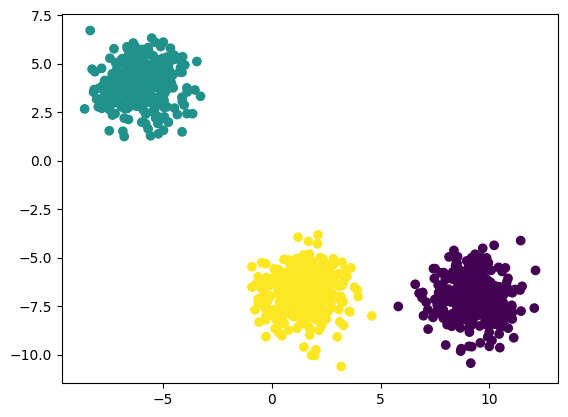

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
wcss


[1340.0,
 217.17105639269354,
 44.29570829911719,
 38.96039314119723,
 33.40066209533968,
 30.07687014673632,
 25.08918751614811,
 22.748603188620557,
 20.598218193773047,
 17.92064155269444]

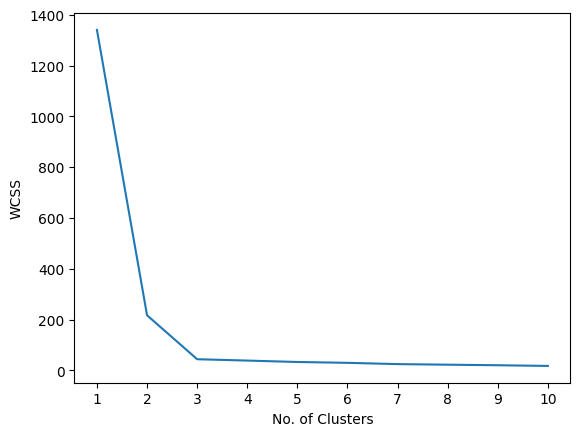

In [9]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [11]:
kmeans.fit_predict(X_train)

array([0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0,
       0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1,
       2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2,
       0, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2,
       2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0,
       2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0,
       2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1,

In [12]:
y_pred=kmeans.predict(X_test)

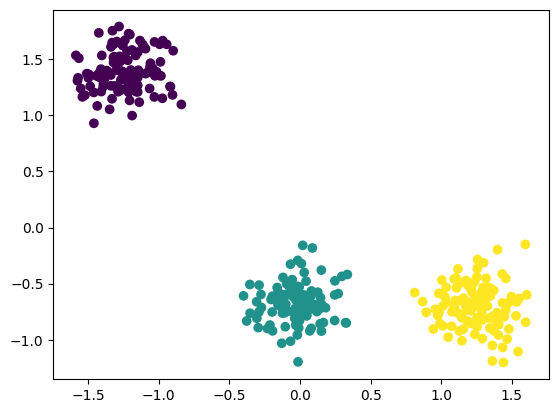

In [13]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)


In [14]:
!pip install kneed

In [15]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [16]:
k1.elbow

np.int64(3)

## SILHOUTTE Scoring

In [17]:
from sklearn.metrics import silhouette_score
silhouette_appends=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_appends.append(score)

In [18]:
silhouette_appends

[np.float64(0.765794414179088),
 np.float64(0.7829645280406855),
 np.float64(0.6548652299797172),
 np.float64(0.5193464982259085),
 np.float64(0.3514785889799871),
 np.float64(0.34384031689659195),
 np.float64(0.3380176097159207),
 np.float64(0.3303347379867432),
 np.float64(0.3229014916709509)]

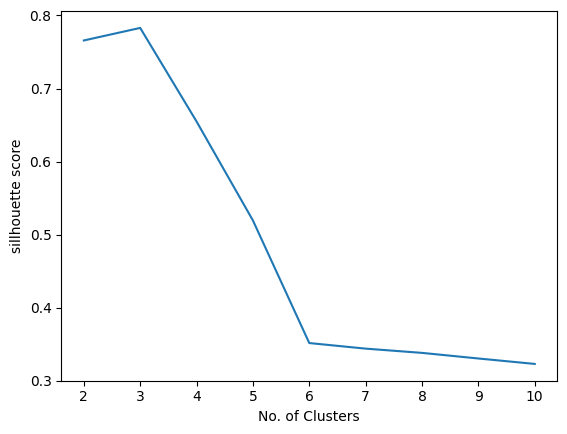

In [19]:
plt.plot(range(2,11),silhouette_appends)
plt.xticks(range(2,11))
plt.xlabel("No. of Clusters")
plt.ylabel("sillhouette score")
plt.show()